In [ ]:
# Install dependencies
!pip install -q numerapi pandas pyarrow matplotlib lightgbm scikit-learn cloudpickle scipy==1.10.1
!pip install torch
!pip install torchsummary
# Inline plots
%matplotlib inline

In [ ]:
!pip install wandb
import json
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import wandb
from numerapi import NumerAPI
napi = NumerAPI()

In [ ]:
all_datasets = napi.list_datasets()
dataset_versions = list(set(d.split('/')[0] for d in all_datasets))
print("Available versions:\n", dataset_versions)

# Set data version to one of the latest datasets
DATA_VERSION = "v4.3"

# Print all files available for download for our version
current_version_files = [f for f in all_datasets if f.startswith(DATA_VERSION)]
print("availbable", DATA_VERSION, "files:\n", current_version_files)

Available versions:
 ['v4', 'v4.1', 'v4.3', 'v4.2']
availbable v4.3 files:
 ['v4.3/features.json', 'v4.3/live_benchmark_models.parquet', 'v4.3/live_example_preds.csv', 'v4.3/live_example_preds.parquet', 'v4.3/live_int8.parquet', 'v4.3/meta_model.parquet', 'v4.3/train_benchmark_models.parquet', 'v4.3/train_int8.parquet', 'v4.3/validation_benchmark_models.parquet', 'v4.3/validation_example_preds.csv', 'v4.3/validation_example_preds.parquet', 'v4.3/validation_int8.parquet']


In [ ]:
train

,era,target,feature_abating_unadaptable_weakfish,feature_ablest_mauritanian_elding,feature_acclimatisable_unfeigned_maghreb,feature_accommodable_crinite_cleft,feature_accretive_sorrier_skedaddle,feature_acetose_periotic_coronation,feature_adam_incantational_winemaker,feature_additive_untrustworthy_hierologist,...,feature_witchy_orange_muley,feature_wombed_liberatory_malva,feature_won_stalwart_eisenstein,feature_wrathful_prolix_colotomy,feature_wrinkliest_unmaintainable_usk,feature_wrought_muckier_temporality,feature_yauld_antediluvial_subprefecture,feature_yelled_hysteretic_eath,feature_yoruban_unapplied_tawse,feature_zygodactyl_exponible_lathi
id,,,,,,,,,,,,,,,,,,,,,
n003bba8a98662e4,0001,0.25,0,4,0,4,2,0,2,1,...,0,0,2,4,2,4,3,2,2,3
n003bee128c2fcfc,0001,0.75,4,2,2,2,2,3,2,1,...,3,3,2,0,2,2,1,3,2,1
n0048ac83aff7194,0001,0.25,4,4,2,0,2,0,2,4,...,0,1,2,0,2,3,2,1,2,2
n00691bec80d3e02,0001,0.75,1,4,1,1,2,0,2,2,...,2,1,2,2,2,3,2,2,2,2
n00b8720a2fdc4f2,0001,0.50,0,2,0,0,2,0,2,3,...,1,1,2,0,2,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nffc2d5e4b79a7ae,0573,0.25,4,2,4,4,3,1,0,0,...,4,1,2,1,3,2,2,2,1,1
nffc7d24176548a4,0573,0.50,0,3,3,4,2,0,2,3,...,2,0,2,4,2,0,2,1,2,3
nffc9844c1c7a6a9,0573,0.50,4,1,1,2,0,3,2,4,...,1,3,0,3,0,2,0,0,1,2


In [ ]:
import json

# download the feature metadata file
napi.download_dataset(f"{DATA_VERSION}/features.json");

# read the metadata and display
feature_metadata = json.load(open(f"{DATA_VERSION}/features.json"))
for metadata in feature_metadata:
  print(metadata, len(feature_metadata[metadata]))

feature_stats 2376
feature_sets 17
targets 41


In [ ]:
feature_metadata = json.load(open(f"{DATA_VERSION}/features.json"))
feature_sets = feature_metadata["feature_sets"]
for feature_set in ["small", "medium", "all"]:
  print(feature_set, len(feature_sets[feature_set]))

small 42
medium 705
all 2376


In [ ]:
# Define our feature set
feature_set = feature_sets["medium"]

# Download the training data - this will take a few minutes
napi.download_dataset(f"{DATA_VERSION}/train_int8.parquet");

# Load only the "medium" feature set to
# Use the "all" feature set to use all features
train = pd.read_parquet(
    f"{DATA_VERSION}/train_int8.parquet",
    columns=["era", "target"] + feature_set
)

# Downsample to every 4th era to reduce memory usage and speedup model training (suggested for Colab free tier)
# Comment out the line below to use all the data
train = train[train["era"].isin(train["era"].unique()[::4])]

In [ ]:
train

,era,target,feature_abating_unadaptable_weakfish,feature_ablest_mauritanian_elding,feature_acclimatisable_unfeigned_maghreb,feature_accommodable_crinite_cleft,feature_accretive_sorrier_skedaddle,feature_acetose_periotic_coronation,feature_adam_incantational_winemaker,feature_additive_untrustworthy_hierologist,...,feature_witchy_orange_muley,feature_wombed_liberatory_malva,feature_won_stalwart_eisenstein,feature_wrathful_prolix_colotomy,feature_wrinkliest_unmaintainable_usk,feature_wrought_muckier_temporality,feature_yauld_antediluvial_subprefecture,feature_yelled_hysteretic_eath,feature_yoruban_unapplied_tawse,feature_zygodactyl_exponible_lathi
id,,,,,,,,,,,,,,,,,,,,,
n003bba8a98662e4,0001,0.25,0,4,0,4,2,0,2,1,...,0,0,2,4,2,4,3,2,2,3
n003bee128c2fcfc,0001,0.75,4,2,2,2,2,3,2,1,...,3,3,2,0,2,2,1,3,2,1
n0048ac83aff7194,0001,0.25,4,4,2,0,2,0,2,4,...,0,1,2,0,2,3,2,1,2,2
n00691bec80d3e02,0001,0.75,1,4,1,1,2,0,2,2,...,2,1,2,2,2,3,2,2,2,2
n00b8720a2fdc4f2,0001,0.50,0,2,0,0,2,0,2,3,...,1,1,2,0,2,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nffc2d5e4b79a7ae,0573,0.25,4,2,4,4,3,1,0,0,...,4,1,2,1,3,2,2,2,1,1
nffc7d24176548a4,0573,0.50,0,3,3,4,2,0,2,3,...,2,0,2,4,2,0,2,1,2,3
nffc9844c1c7a6a9,0573,0.50,4,1,1,2,0,3,2,4,...,1,3,0,3,0,2,0,0,1,2


In [ ]:
# Define the Swish activation function
class Swish(nn.Module):
    def __init__(self):
        super(Swish, self).__init__()

    def forward(self, x):
        return x * torch.sigmoid(x)

In [ ]:
# Define the Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, feature_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(feature_dim, 1500),
            nn.BatchNorm1d(1500),
            Swish(),
            nn.Linear(1500, 1000),
            nn.BatchNorm1d(1000),
            Swish(),
            nn.Linear(1000, 500),
            nn.BatchNorm1d(500),
            Swish(),
            nn.Linear(500, encoding_dim),
            nn.BatchNorm1d(encoding_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 500),
            nn.BatchNorm1d(500),
            Swish(),
            nn.Linear(500, 1000),
            nn.BatchNorm1d(1000),
            Swish(),
            nn.Linear(1000, 1500),
            nn.BatchNorm1d(1500),
            Swish(),
            nn.Linear(1500, feature_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [ ]:
# Define the MLP
class MLP(nn.Module):
    def __init__(self, input_dim, dropout_rate):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.BatchNorm1d(1024),
            Swish(),
            nn.Dropout(dropout_rate),
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            Swish(),
            nn.Dropout(dropout_rate),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            Swish(),
            nn.Dropout(dropout_rate),
            nn.Linear(256, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
sweep_config = {
    'method': 'bayes',
    'metric': {
        'name': 'val_loss',
        'goal': 'minimize'
    },
    'parameters': {
        'learning_rate': {
            'values': [0.01, 0.001, 0.0001]
        },
        'batch_size': {
            'values': [64, 128]
        },
        'dropout_rate': {
            'values': [0.3, 0.4]
        }
    }
}

In [ ]:
wandb.login()

wandb: Currently logged in as: bychan (buquestrom). Use `wandb login --relogin` to force relogin


True

In [ ]:
# Initialize the wandb sweep
sweep_id = wandb.sweep(sweep_config, project="ba865_tuning")

Create sweep with ID: 4ejaseve
Sweep URL: https://wandb.ai/buquestrom/ba865_tuning/sweeps/4ejaseve


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import wandb

def train_model():
    with wandb.init(project="Hyperparameter_tuning_full") as run:
        config = run.config

        # Fixed parameters
        epochs = 5
        feature_dim = 705
        encoding_dim = 300

        # Convert data to tensors
        X_train_tensor = torch.tensor(train[feature_set].values, dtype=torch.float32)
        y_train_tensor = torch.tensor(train['target'].values, dtype=torch.float32).view(-1, 1)

        # Split data into training and validation sets
        X_train, X_val, y_train, y_val = train_test_split(
            X_train_tensor, y_train_tensor, test_size=0.2, random_state=42)

        # Create DataLoaders
        train_dataset = TensorDataset(X_train, y_train)
        train_dataloader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True)
        val_dataset = TensorDataset(X_val, y_val)
        val_dataloader = DataLoader(val_dataset, batch_size=config.batch_size, shuffle=False)

        # Initialize models
        autoencoder = Autoencoder(feature_dim, encoding_dim)
        mlp = MLP(feature_dim + encoding_dim, config.dropout_rate)

        # Initialize optimizer and loss functions
        optimizer = torch.optim.Adam(list(autoencoder.parameters()) + list(mlp.parameters()), lr=config.learning_rate)
        ae_criterion = nn.MSELoss()
        mlp_criterion = nn.MSELoss()

        # Initialize the best validation loss to a high value
        best_val_loss = float('inf')
        patience = 5
        trigger_times = 0

        # Training loop
        for epoch in range(epochs):
            autoencoder.train()
            mlp.train()
            for data, targets in train_dataloader:
                optimizer.zero_grad()
                noise = torch.randn_like(data) * 0.1
                noisy_data = data + noise
                encoded, decoded = autoencoder(noisy_data)
                ae_loss = ae_criterion(decoded, data)
                combined_features = torch.cat((encoded, data), dim=1)
                predictions = mlp(combined_features)
                mlp_loss = mlp_criterion(predictions, targets)
                loss = ae_loss + mlp_loss
                loss.backward()
                optimizer.step()
                wandb.log({"train_loss": loss.item(), "ae_loss": ae_loss.item(), "mlp_loss": mlp_loss.item()})

            # Validation phase
            val_loss = 0
            with torch.no_grad():
                autoencoder.eval()
                mlp.eval()
                for data, targets in val_dataloader:
                    encoded, decoded = autoencoder(data)
                    combined_features = torch.cat((encoded, data), dim=1)
                    predictions = mlp(combined_features)
                    batch_loss = mlp_criterion(predictions, targets).item()
                    val_loss += batch_loss

            val_loss /= len(val_dataloader)
            wandb.log({"val_loss": val_loss})

            print(f'Epoch {epoch + 1}: Train Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')

            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_model = {'autoencoder': autoencoder.state_dict(), 'mlp': mlp.state_dict()}
                torch.save(best_model, 'best_model_state.pth')  # Save the best model
                print(f"Saved new best model with validation loss: {val_loss:.4f}")
                wandb.run.summary["best_val_loss"] = best_val_loss
                trigger_times = 0
            else:
                trigger_times += 1
                if trigger_times >= patience:
                    print("Early stopping!")

In [ ]:
def train_model():
    with wandb.init(project="Hyperparameter_tuning_full") as run:
        config = run.config

        # Fixed parameters
        epochs = 5
        feature_dim = 705
        encoding_dim = 300

        # Convert data to tensors
        X_train_tensor = torch.tensor(train[feature_set].values, dtype=torch.float32)
        y_train_tensor = torch.tensor(train['target'].values, dtype=torch.float32).view(-1, 1)

        # Split data into training and validation sets
        X_train, X_val, y_train, y_val = train_test_split(
            X_train_tensor, y_train_tensor, test_size=0.2, random_state=42)

        # Create DataLoaders
        train_dataset = TensorDataset(X_train, y_train)
        train_dataloader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True)
        val_dataset = TensorDataset(X_val, y_val)
        val_dataloader = DataLoader(val_dataset, batch_size=config.batch_size, shuffle=False)

        # Initialize models
        autoencoder = Autoencoder(feature_dim, encoding_dim)
        mlp = MLP(feature_dim + encoding_dim, config.dropout_rate)

        # Initialize optimizer and loss functions
        optimizer = torch.optim.Adam(list(autoencoder.parameters()) + list(mlp.parameters()), lr=config.learning_rate)
        ae_criterion = nn.MSELoss()
        mlp_criterion = nn.MSELoss()

        # Initialize the best validation loss to a high value
        best_val_loss = float('inf')
        patience = 5
        trigger_times = 0

        # Training loop
        for epoch in range(epochs):
            autoencoder.train()
            mlp.train()
            for data, targets in train_dataloader:
                optimizer.zero_grad()
                noise = torch.randn_like(data) * 0.1
                noisy_data = data + noise
                encoded, decoded = autoencoder(noisy_data)
                ae_loss = ae_criterion(decoded, data)
                combined_features = torch.cat((encoded, data), dim=1)
                predictions = mlp(combined_features)
                mlp_loss = mlp_criterion(predictions, targets)
                loss = ae_loss + mlp_loss
                loss.backward()
                optimizer.step()
                wandb.log({"train_loss": loss.item(), "ae_loss": ae_loss.item(), "mlp_loss": mlp_loss.item()})

            # Validation phase
            val_loss = 0
            with torch.no_grad():
                autoencoder.eval()
                mlp.eval()
                for data, targets in val_dataloader:
                    encoded, decoded = autoencoder(data)
                    combined_features = torch.cat((encoded, data), dim=1)
                    predictions = mlp(combined_features)
                    batch_loss = mlp_criterion(predictions, targets).item()
                    val_loss += batch_loss

            val_loss /= len(val_dataloader)
            wandb.log({"val_loss": val_loss})

            print(f'Epoch {epoch + 1}: Train Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')

            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_model = {'autoencoder': autoencoder.state_dict(), 'mlp': mlp.state_dict()}
                wandb.run.summary["best_val_loss"] = best_val_loss
                trigger_times = 0
            else:
                trigger_times += 1
                if trigger_times >= patience:
                    print("Early stopping!")

In [ ]:
wandb.agent(sweep_id, train_model, count=10)

wandb: Agent Starting Run: 5vczevsv with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.3
wandb: 	learning_rate: 0.01
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch 1: Train Loss: 1.4426, Val Loss: 0.0542
Saved new best model with validation loss: 0.0542
Epoch 2: Train Loss: 2.8364, Val Loss: 0.0498
Saved new best model with validation loss: 0.0498
Epoch 3: Train Loss: 2.0089, Val Loss: 0.0569
Epoch 4: Train Loss: 4.8579, Val Loss: 0.0502
Epoch 5: Train Loss: 1.3668, Val Loss: 0.0602


ae_loss,█▇▅▅▄▅▅▄▄▄▄▄▄▆▄▃▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁
mlp_loss,▃▃▃▃▃▂█▁▄▃▄▄▄▆▅▆▄▃▃▂▃▄▄▄▄▆▃▃▄▄▃▃▂▆▄▂▄▄▂▃
train_loss,█▇▅▅▄▅▆▄▄▄▄▄▄▆▄▄▄▃▄▃▃▃▃▃▃▂▂▃▂▂▂▂▂▂▂▁▂▁▁▁
val_loss,▄▁▆▁█
ae_loss,1.31862
best_val_loss,0.04976
mlp_loss,0.04815
train_loss,1.36678
val_loss,0.06019


wandb: Agent Starting Run: x90a6k2z with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.4
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch 1: Train Loss: 0.7126, Val Loss: 0.0516
Saved new best model with validation loss: 0.0516
Epoch 2: Train Loss: 0.7162, Val Loss: 0.0499
Saved new best model with validation loss: 0.0499
Epoch 3: Train Loss: 0.6358, Val Loss: 0.0501
Epoch 4: Train Loss: 0.6304, Val Loss: 0.0496
Saved new best model with validation loss: 0.0496
Epoch 5: Train Loss: 0.5869, Val Loss: 0.0496
Saved new best model with validation loss: 0.0496


ae_loss,█▆▅▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mlp_loss,█▄▄▄▂▃▄▃▂▁▂▂▂▂▃▂▂▃▃▂▃▂▃▂▃▃▁▂▃▂▂▃▄▂▃▃▃▃▄▂
train_loss,█▆▅▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▂▃▁▁
ae_loss,0.55471
best_val_loss,0.04962
mlp_loss,0.03219
train_loss,0.5869
val_loss,0.04962


wandb: Agent Starting Run: s1f738v1 with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.3
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch 1: Train Loss: 0.5710, Val Loss: 0.0518
Saved new best model with validation loss: 0.0518
Epoch 2: Train Loss: 0.4954, Val Loss: 0.0504
Saved new best model with validation loss: 0.0504
Epoch 3: Train Loss: 0.4853, Val Loss: 0.0499
Saved new best model with validation loss: 0.0499
Epoch 4: Train Loss: 0.4425, Val Loss: 0.0498
Saved new best model with validation loss: 0.0498
Epoch 5: Train Loss: 0.3928, Val Loss: 0.0500


ae_loss,█▆▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mlp_loss,█▅▄▃▃▁▂▂▂▃▂▃▄▂▂▂▂▂▂▂▃▂▂▂▂▁▁▁▂▃▃▂▁▂▂▂▂▁▁▂
train_loss,█▆▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▃▁▁▂
ae_loss,0.34278
best_val_loss,0.04981
mlp_loss,0.05005
train_loss,0.39283
val_loss,0.05001


wandb: Agent Starting Run: guw57p7a with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.4
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch 1: Train Loss: 0.6287, Val Loss: 0.0550
Saved new best model with validation loss: 0.0550
Epoch 2: Train Loss: 0.4934, Val Loss: 0.0510
Saved new best model with validation loss: 0.0510
Epoch 3: Train Loss: 0.4469, Val Loss: 0.0498
Saved new best model with validation loss: 0.0498
Epoch 4: Train Loss: 0.4323, Val Loss: 0.0499
Epoch 5: Train Loss: 0.4104, Val Loss: 0.0499


ae_loss,█▇▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mlp_loss,█▆▃▂▂▂▂▂▂▂▂▂▂▁▂▂▃▂▂▂▂▁▂▂▂▂▂▂▃▂▂▂▃▂▂▂▂▂▂▂
train_loss,█▆▅▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▃▁▁▁
ae_loss,0.35227
best_val_loss,0.04978
mlp_loss,0.05817
train_loss,0.41044
val_loss,0.04991


wandb: Agent Starting Run: fkwie04u with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.4
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch 1: Train Loss: 0.6110, Val Loss: 0.0582
Saved new best model with validation loss: 0.0582
Epoch 2: Train Loss: 0.4945, Val Loss: 0.0511
Saved new best model with validation loss: 0.0511
Epoch 3: Train Loss: 0.4454, Val Loss: 0.0503
Saved new best model with validation loss: 0.0503
Epoch 4: Train Loss: 0.4129, Val Loss: 0.0499
Saved new best model with validation loss: 0.0499
Epoch 5: Train Loss: 0.3717, Val Loss: 0.0496
Saved new best model with validation loss: 0.0496


ae_loss,█▆▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mlp_loss,█▅▄▂▂▃▂▂▃▂▂▂▂▂▂▂▁▁▂▁▁▂▂▁▂▁▂▁▁▁▂▁▂▂▁▂▂▂▁▂
train_loss,█▆▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▂▂▁▁
ae_loss,0.33224
best_val_loss,0.04963
mlp_loss,0.03942
train_loss,0.37166
val_loss,0.04963


wandb: Agent Starting Run: 2vaa0vst with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.4
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch 1: Train Loss: 0.6071, Val Loss: 0.0560
Saved new best model with validation loss: 0.0560
Epoch 2: Train Loss: 0.5329, Val Loss: 0.0509
Saved new best model with validation loss: 0.0509
Epoch 3: Train Loss: 0.4716, Val Loss: 0.0498
Saved new best model with validation loss: 0.0498
Epoch 4: Train Loss: 0.4259, Val Loss: 0.0499
Epoch 5: Train Loss: 0.4292, Val Loss: 0.0497
Saved new best model with validation loss: 0.0497


ae_loss,█▆▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mlp_loss,█▅▃▃▂▂▂▁▂▂▂▂▂▂▁▂▁▂▂▁▂▂▂▂▂▂▂▃▂▂▂▂▁▁▂▁▁▁▁▁
train_loss,█▆▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▂▁▁▁
ae_loss,0.37915
best_val_loss,0.04971
mlp_loss,0.05006
train_loss,0.42921
val_loss,0.04971


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 43tx5pm4 with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.4
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch 1: Train Loss: 0.5919, Val Loss: 0.0551
Saved new best model with validation loss: 0.0551
Epoch 2: Train Loss: 0.5171, Val Loss: 0.0510
Saved new best model with validation loss: 0.0510
Epoch 3: Train Loss: 0.4532, Val Loss: 0.0501
Saved new best model with validation loss: 0.0501
Epoch 4: Train Loss: 0.4283, Val Loss: 0.0498
Saved new best model with validation loss: 0.0498
Epoch 5: Train Loss: 0.4167, Val Loss: 0.0497
Saved new best model with validation loss: 0.0497


ae_loss,█▇▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mlp_loss,█▅▃▂▂▂▂▂▁▂▂▁▁▂▂▁▂▂▂▂▂▂▂▂▁▁▂▂▂▁▁▂▁▁▂▂▂▂▂▂
train_loss,█▆▅▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▃▂▁▁
ae_loss,0.3669
best_val_loss,0.04971
mlp_loss,0.04983
train_loss,0.41673
val_loss,0.04971


wandb: Agent Starting Run: vfp6vffi with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.4
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch 1: Train Loss: 0.5914, Val Loss: 0.0544
Saved new best model with validation loss: 0.0544
Epoch 2: Train Loss: 0.5015, Val Loss: 0.0505
Saved new best model with validation loss: 0.0505
Epoch 3: Train Loss: 0.4348, Val Loss: 0.0501
Saved new best model with validation loss: 0.0501
Epoch 4: Train Loss: 0.4375, Val Loss: 0.0497
Saved new best model with validation loss: 0.0497
Epoch 5: Train Loss: 0.3960, Val Loss: 0.0497
Saved new best model with validation loss: 0.0497


ae_loss,█▆▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mlp_loss,█▆▃▃▂▂▃▂▂▃▃▃▂▃▂▂▂▂▂▂▃▃▂▁▂▂▃▂▁▃▂▁▂▂▃▂▂▂▃▂
train_loss,█▆▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▂▂▁▁
ae_loss,0.34681
best_val_loss,0.04966
mlp_loss,0.04918
train_loss,0.39599
val_loss,0.04966


wandb: Agent Starting Run: e3c0z95n with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.4
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch 1: Train Loss: 0.6322, Val Loss: 0.0563
Saved new best model with validation loss: 0.0563
Epoch 2: Train Loss: 0.5097, Val Loss: 0.0502
Saved new best model with validation loss: 0.0502
Epoch 3: Train Loss: 0.4516, Val Loss: 0.0499
Saved new best model with validation loss: 0.0499
Epoch 4: Train Loss: 0.4302, Val Loss: 0.0497
Saved new best model with validation loss: 0.0497
Epoch 5: Train Loss: 0.4094, Val Loss: 0.0498


ae_loss,█▇▅▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mlp_loss,█▅▄▂▂▃▂▄▃▂▂▂▁▂▂▁▂▂▂▃▁▂▂▂▂▁▂▁▂▃▂▁▂▁▂▂▂▂▂▂
train_loss,█▆▅▄▄▃▃▃▃▂▃▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▂▁▁▁
ae_loss,0.36043
best_val_loss,0.04969
mlp_loss,0.04901
train_loss,0.40944
val_loss,0.04977


wandb: Agent Starting Run: uyfxrqwr with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.4
wandb: 	learning_rate: 0.0001
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Epoch 1: Train Loss: 0.6213, Val Loss: 0.0556
Saved new best model with validation loss: 0.0556
Epoch 2: Train Loss: 0.4812, Val Loss: 0.0507
Saved new best model with validation loss: 0.0507
Epoch 3: Train Loss: 0.4461, Val Loss: 0.0501
Saved new best model with validation loss: 0.0501
Epoch 4: Train Loss: 0.4091, Val Loss: 0.0497
Saved new best model with validation loss: 0.0497
Epoch 5: Train Loss: 0.4008, Val Loss: 0.0498


ae_loss,█▆▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
mlp_loss,█▆▃▂▂▃▂▂▂▂▂▃▂▃▃▂▂▂▁▁▃▂▂▁▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂
train_loss,█▆▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▂▁▁▁
ae_loss,0.35655
best_val_loss,0.04969
mlp_loss,0.04421
train_loss,0.40076
val_loss,0.04984


In [ ]:
import torch
from torch import nn

# Define the Swish activation function
class Swish(nn.Module):
    def __init__(self):
        super(Swish, self).__init__()
    def forward(self, x):
        return x * torch.sigmoid(x)

# Define the Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, feature_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(feature_dim, 1500),
            nn.BatchNorm1d(1500),
            Swish(),
            nn.Linear(1500, 1000),
            nn.BatchNorm1d(1000),
            Swish(),
            nn.Linear(1000, 500),
            nn.BatchNorm1d(500),
            Swish(),
            nn.Linear(500, encoding_dim),
            nn.BatchNorm1d(encoding_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 500),
            nn.BatchNorm1d(500),
            Swish(),
            nn.Linear(500, 1000),
            nn.BatchNorm1d(1000),
            Swish(),
            nn.Linear(1000, 1500),
            nn.BatchNorm1d(1500),
            Swish(),
            nn.Linear(1500, feature_dim)
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# Define the MLP
class MLP(nn.Module):
    def __init__(self, input_dim, dropout_rate):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.BatchNorm1d(1024),
            Swish(),
            nn.Dropout(dropout_rate),
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            Swish(),
            nn.Dropout(dropout_rate),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            Swish(),
            nn.Dropout(dropout_rate),
            nn.Linear(256, 1)
        )
    def forward(self, x):
        return self.layers(x)

# Initialize the models with the best hyperparameters
feature_dim = 705  # Your feature dimension
encoding_dim = 300  # Your encoding dimension
input_dim = feature_dim + encoding_dim  # Total input dimension for MLP
dropout_rate = 0.4  # Best dropout rate from hyperparameter tuning
batch_size = 128  # Best batch size from tuning
learning_rate = 0.001  # Best learning rate from tuning

autoencoder = Autoencoder(feature_dim, encoding_dim)
mlp = MLP(input_dim, dropout_rate)

# Manually save the initialized state of these models
best_model = {'autoencoder': autoencoder.state_dict(), 'mlp': mlp.state_dict()}
torch.save(best_model, 'best_model_state.pth')
print("Model saved successfully.")


Model saved successfully.


In [ ]:
dropout_rate = 0.4  # Best dropout rate from hyperparameter tuning
feature_dim = 705  # Your feature dimension
encoding_dim = 300  # Your encoding dimension
input_dim = feature_dim + encoding_dim  # Total input dimension for MLP
autoencoder = Autoencoder(feature_dim, encoding_dim)
mlp = MLP(input_dim, dropout_rate)
# Load the model for evaluation
autoencoder.load_state_dict(torch.load('best_model_state.pth')['autoencoder'])
mlp.load_state_dict(torch.load('best_model_state.pth')['mlp'])

<All keys matched successfully>

In [ ]:
# Ensure the model is in evaluation mode
autoencoder.eval()

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=705, out_features=1500, bias=True)
    (1): BatchNorm1d(1500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Swish()
    (3): Linear(in_features=1500, out_features=1000, bias=True)
    (4): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Swish()
    (6): Linear(in_features=1000, out_features=500, bias=True)
    (7): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Swish()
    (9): Linear(in_features=500, out_features=300, bias=True)
    (10): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=300, out_features=500, bias=True)
    (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Swish()
    (3): Linear(in_features=500, out_features=1000, bias=True)
    (4): BatchNorm1d(1000, eps=1e-0

In [ ]:
mlp.eval()

MLP(
  (layers): Sequential(
    (0): Linear(in_features=1005, out_features=1024, bias=True)
    (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Swish()
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=1024, out_features=512, bias=True)
    (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Swish()
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=512, out_features=256, bias=True)
    (9): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Swish()
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=256, out_features=1, bias=True)
  )
)

In [ ]:
# Print all files available for download for our version
current_version_files = [f for f in all_datasets if f.startswith(DATA_VERSION)]
print("availbable", DATA_VERSION, "files:\n", current_version_files)

availbable v4.3 files:
 ['v4.3/features.json', 'v4.3/live_benchmark_models.parquet', 'v4.3/live_example_preds.csv', 'v4.3/live_example_preds.parquet', 'v4.3/live_int8.parquet', 'v4.3/meta_model.parquet', 'v4.3/train_benchmark_models.parquet', 'v4.3/train_int8.parquet', 'v4.3/validation_benchmark_models.parquet', 'v4.3/validation_example_preds.csv', 'v4.3/validation_example_preds.parquet', 'v4.3/validation_int8.parquet']


In [ ]:
# Load the validation data and filter for data_type == "validation"
validation = pd.read_parquet(
    f"{DATA_VERSION}/validation_int8.parquet",
    columns=["era", "data_type", "target"] + feature_set
)
validation = validation[validation["data_type"] == "validation"]
del validation["data_type"]

# Downsample to every 4th era to reduce memory usage and speedup evaluation (suggested for Colab free tier)
# Comment out the line below to use all the data (slower and higher memory usage, but more accurate evaluation)
validation = validation[validation["era"].isin(validation["era"].unique()[::4])]

# Eras are 1 week apart, but targets look 20 days (o 4 weeks/eras) into the future,
# so we need to "embargo" the first 4 eras following our last train era to avoid "data leakage"
last_train_era = int(train["era"].unique()[-1])
eras_to_embargo = [str(era).zfill(4) for era in [last_train_era + i for i in range(4)]]
validation = validation[~validation["era"].isin(eras_to_embargo)]

In [ ]:
# Prepare the validation dataset
X_val_tensor = torch.tensor(validation[feature_set].values, dtype=torch.float32)
y_val_tensor = torch.tensor(validation['target'].values, dtype=torch.float32).view(-1, 1)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_dataloader = DataLoader(val_dataset, batch_size=128, shuffle=False)

In [ ]:
# Calculate predictions and MSE on the validation dataset
from sklearn.metrics import mean_squared_error

all_predictions = []
all_targets = []

with torch.no_grad():
    for data, targets in val_dataloader:
        encoded, _ = autoencoder(data)  # Only encoded is needed for prediction
        predictions = mlp(torch.cat((encoded, data), dim=1))
        all_predictions.extend(predictions.numpy())
        all_targets.extend(targets.numpy())

# Calculate and print the Mean Squared Error
mse = mean_squared_error(all_targets, all_predictions)
print("Mean Squared Error on the Validation Set:", mse)

Mean Squared Error on the Validation Set: 0.0499404


In [ ]:
# Downsample and embargo
last_train_era = int(train["era"].unique()[-1])
eras_to_embargo = [str(last_train_era + i).zfill(4) for i in range(1, 5)]  # Corrected for correct range and format
validation = validation[~validation["era"].isin(eras_to_embargo)]

In [ ]:
# Convert features to tensor for PyTorch processing
X_val_tensor = torch.tensor(validation[feature_set].values, dtype=torch.float32)

In [ ]:
with torch.no_grad():
    # Assuming your validation features are normalized if required
    encoded_features, _ = autoencoder(X_val_tensor)  # Get the encoded features
    predictions = mlp(torch.cat((encoded_features, X_val_tensor), dim=1))  # Get predictions from MLP
    validation['prediction'] = predictions.numpy().flatten()  # Convert predictions to numpy and store in DataFrame

In [ ]:
validation[["era", "prediction", "target"]]

,era,prediction,target
id,,,
n002a15bc5575bbb,0579,0.477808,0.25
n00309caaa0f955e,0579,0.512298,0.50
n00576b397182463,0579,0.497695,0.50
n00633405d59c6a1,0579,0.493233,1.00
n008c2eefc8911c7,0579,0.484245,0.50
...,...,...,...
nffdb6e40e2f845c,1103,0.519577,0.25
nffe7ab06ef8a5a5,1103,0.530658,0.50
nffeddeb986175f9,1103,0.484573,0.50


In [ ]:
mse_per_era = validation.groupby('era').apply(
    lambda df: mean_squared_error(df['target'], df['prediction'])
)
print(mse_per_era)

era
0579    0.049791
0583    0.049970
0587    0.050287
0591    0.050027
0595    0.050013
          ...   
1087    0.049835
1091    0.049758
1095    0.050043
1099    0.049999
1103    0.049719
Length: 132, dtype: float32


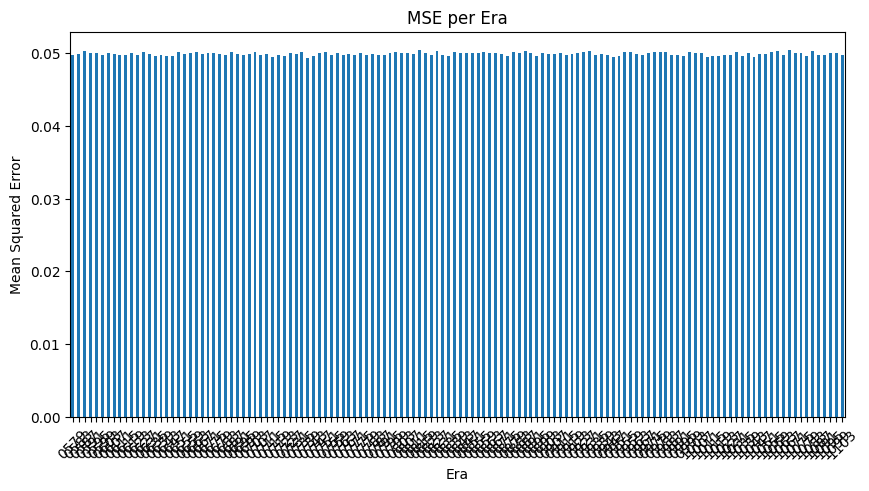

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
mse_per_era.plot(kind='bar')
plt.title('MSE per Era')
plt.xlabel('Era')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.show()
